## NCX Channel Inactivation

In [65]:
import random as random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import pandas as pd

![img](img\ncx.png)

### Notations

- **$E_1$ :** States with binding sites orientewd to the cytoplasmic sides
- **$E_2$ :** States with binding sites orientewd to the extracellular sides

------------

- **$E_{1}3N_{i}$ :** States with binding sites orientewd to the cytoplasmic sides containing 3 Na+ ions
- **$E_{0}3N$ :** States with binding sites occluded with 3 Na+ ions 
- **$E_{2}3N_{0}$ :** States with binding sites orientewd to the extracellular sides with 3 Na+ ions

------------

- **$E_{1}C_{1}$ :** States with binding sites orientewd to the cytoplasmic sides containing 1 Ca++ ion
- **$E_{0}C$ :** States with binding sites occluded with 1 Ca++ ion
- **$E_{2}C_{0}$ :** States with binding sites orientewd to the extracellular sides with 1 Ca++ ion



### Constants

- **Name** : $\gamma$ = 0.02
- **Membrane Potential** : $Em =... $
- **Name** : $Kem = exp{(0.5\times(1-\gamma)\times Em \times \frac{F}{RT}}) = ....$

-------------

- **Rate Constan** : $k_{1} = 10^{4} \times Kem$
- **Rate Constan** : $k_{2} = F_{3no} \times \frac{10^{4}}{Kem}$
- **Rate Constan** : $k_{3} = F_{co} \times 5.17 \times 10^{4} \times Kem$
- **Rate Constan** : $k_{4} = 5.17 \times 10^{4}$
- **Rate Constan** : $k_{5} = 5.17 \times 10^{4}$
- **Rate Constan** : $k_{6} = F_{ci} \times 5.17 \times 10^{4} $
- **Rate Constan** : $k_{7} = F_{3ni} \times 1.84 \times 10^{4}$
- **Rate Constan** : $k_{8} = 1.84 \times 10^{4} \times$

-------------
- **Rate Constan** : $k_{bak} = 0.12 $
- **Rate Constan** : $k_{in} = 0.8$



In [66]:
k1 = 0.16
k2 = 0.15
k3 = 0.11
k4 = 0.14
k5 = 0.12
k6 = 0.17
k7 = 0.12
k8 = 0.13

k_bak = 0.12
k_in = 0.18

ko = 0.1

### Model : Monte Carlo Simulation of Markov Model

In [ ]:
K_1ni = 700
K_2ni = 9
K_3ni = 9
K_4ni = 8
K_ci = 0.01

In [ ]:
F_E14Na = Na_i*(K_ci/Di)
F_E1Ca = Ca_i*K_1ni*K_2ni*K_3ni*(K_4ni/D_i)
D_i = (Na_i**4)*K_ci + \
      (Na_i**3)*K_4ni*K_ci + \
      (Na_i**2)*K_3ni*K_4ni*K_ci +\
       Na_i*K_2ni*K_3ni*K_4ni*K_ci +\
       K_1ni*K_2ni*K_3ni*K4ni*K_ci +\
       Ca_i*K_1ni*K_2ni*K_3ni*K_4ni

#### Tansition Probabilities

In [67]:
M = {"Ei_3Ni": [1 - k_bak,  k_bak,      0,        0,     0,       0,      0,       0,      0],
    "E1_3Ni":  [k_in,       1-k_in-ko-k7, k7,     0,     0,       0,      0,       ko,     0],
    "E0_3N":   [0,          k8,         1-k8-k1,  k1,    0,       0,      0,       0,      0],
    "E2_3N0":  [0,          0,          k2,       1-k2,  0,       0,      0,       0,      0],
    "E1_Ci":   [0,          0,          0,        0,     1-k6-ko, k6,     0,       ko,     0],
    "E0_C":    [0,          0,          0,        0,     k5,      1-k5-k4,k4,      0,      0],
    "E2_C0":   [0,          0,          0,        0,     0,       k3,     1-k3-ko, 0,      ko],
    "E1":      [0,          ko,         0,        0,     ko,      0,      0,       1-ko-ko,0],
    "E2":      [0,          0,          0,        ko,    0,       0,      ko,      0,      1-ko-ko]}

#### States

In [68]:
states = ["Ei_3Ni",\
          "E1_3Ni",\
          "E0_3N",\
          "E2_3N0",\
          "E1_Ci",\
          "E0_C",\
          "E2_C0",\
          "E1",\
          "E2"]

#### Simulation

In [89]:
current_state = "E1"
T =1000
N =1000

SS = [["E1" for n in range (T)] for t in range(N)]

for n in range(N):
    for t in range(T):
        new_state = np.random.choice(states, p = M[current_state])
        #print(new_state)
        SS[n][t] = new_state
        current_state = new_state 

In [90]:
ss = np.array(SS)

In [91]:
Data = []
for t in range(T):
    ei_3ni = list(ss[:,t]).count("Ei_3Ni")/float(N)
    
    e1_3ni = list(ss[:,t]).count("E1_3Ni")/float(N)
    e0_3n = list(ss[:,t]).count("E0_3N")/float(N)
    e2_3n0 = list(ss[:,t]).count("E2_3N0")/float(N)
    
    e1_ci = list(ss[:,t]).count("E1_Ci")/float(N)
    e0_c = list(ss[:,t]).count("E0_C")/float(N)
    e2_c0 = list(ss[:,t]).count("E2_C0")/float(N)
    
    e1 = list(ss[:,t]).count("E1")/float(N)
    e2 = list(ss[:,t]).count("E2")/float(N)
    
    Data.append({"Ei_3Ni" : ei_3ni,\
          "E1_3Ni": e1_3ni,\
          "E0_3N" : e0_3n,\
          "E2_3N0": e2_3n0,\
          "E1_Ci" : e1_ci,\
          "E0_C"  : e0_c,\
          "E2_C0" : e2_c0,\
          "E1"    : e1,\
          "E2"    : e2})

-------

### Results

In [92]:
DF = pd.DataFrame(Data)
DF.head()

,E0_3N,E0_C,E1,E1_3Ni,E1_Ci,E2,E2_3N0,E2_C0,Ei_3Ni
0,0.138,0.082,0.102,0.141,0.073,0.029,0.186,0.067,0.182
1,0.146,0.080,0.096,0.139,0.067,0.034,0.185,0.070,0.183
2,0.157,0.091,0.097,0.121,0.066,0.033,0.175,0.059,0.201
3,0.150,0.079,0.091,0.128,0.074,0.035,0.171,0.068,0.204
4,0.153,0.076,0.090,0.126,0.079,0.030,0.168,0.066,0.212


In [93]:
DF["F3n"] = DF["E1_3Ni"] + DF["E1_Ci"] + DF["E1"]

In [94]:
DF["Fa"] = DF["F3n"].apply(lambda x : k_bak/(k_bak + (x * k_in)))

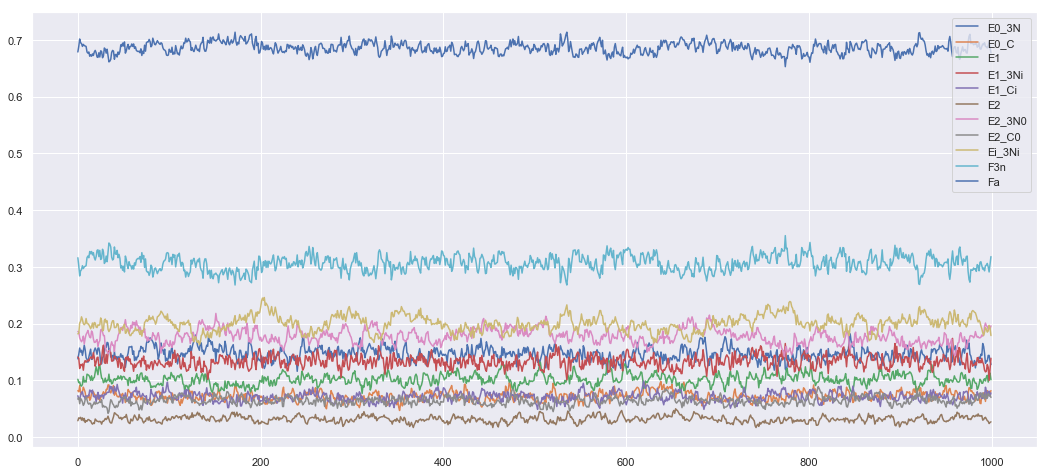

In [95]:
DF.plot(figsize = [18,8])

#### Current Measurement

In [99]:
S = 1.0

In [100]:
I_naca = S*DF["Fa"]*DF["F3n"]

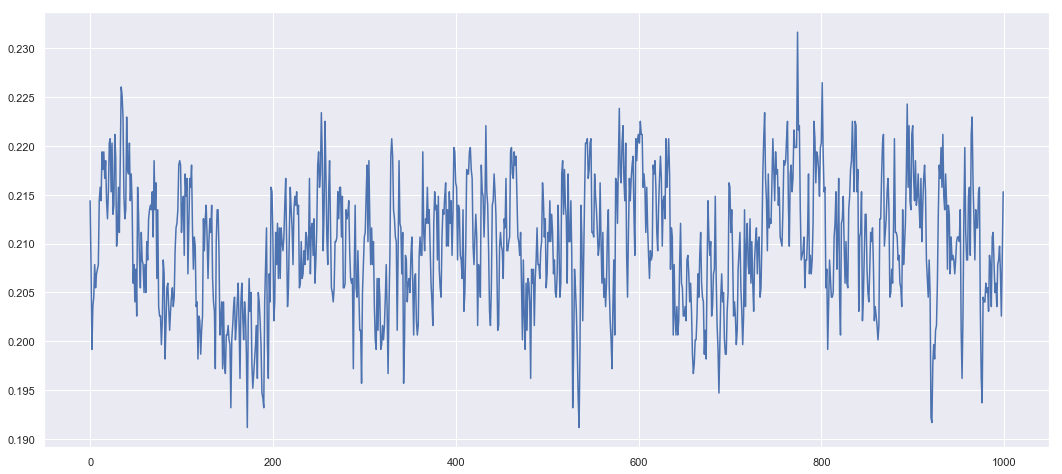

In [101]:
I_naca.plot(figsize = [18,8])

### Discussion